# Project data exploration - looking at relplot and scatter
Using a dataset that your group is consider using for the term project, let's do some data exploring of the different features in your dataset and their relationships

Group name:  
Created by Evan Farnsworth, Jason Doria, Jeffrey Zhan, Vibhitha Nandakumar
Last updated: 9/23/25  
Our dataset measures the relationship between remote work and productivity, focusing on age-productivity correlation, years of experience's impact on remote work effectiveness, WFH days per week optimal balance analysis, and multiple productivity metrics.

Import your data. If you want to mount your Google drive you can use `from google.colab import drive` and `drive.mount('/content/drive')`

### Q1: Show the number of missing data in each column of the dataframe

In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

df = pd.read_csv("hf://datasets/nprak26/remote-worker-productivity/remote_work_productivity.csv")


/usr/local/lib/python3.12/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


### Q2: Show the data type for each column of the dataframe

In [5]:
df.dtypes

,0
Employee_ID,object
Age,int64
Years_Experience,int64
WFH_Days_Per_Week,int64
Gender,object
Education_Level,object
Marital_Status,object
Has_Children,object
Location_Type,object
Department,object


### Q3: Create a pair plot to show pairwise relationship in this dataset.
Draw the pairwise polynomial regression lines in a different color than the data points. Use a light color for the data points to deemphasizing the points to make the regression line stand out. Include a meaningful title to the plot.

Text(0.5, 1.05, 'Pairwise relationships in the World Happiness Report dataset')

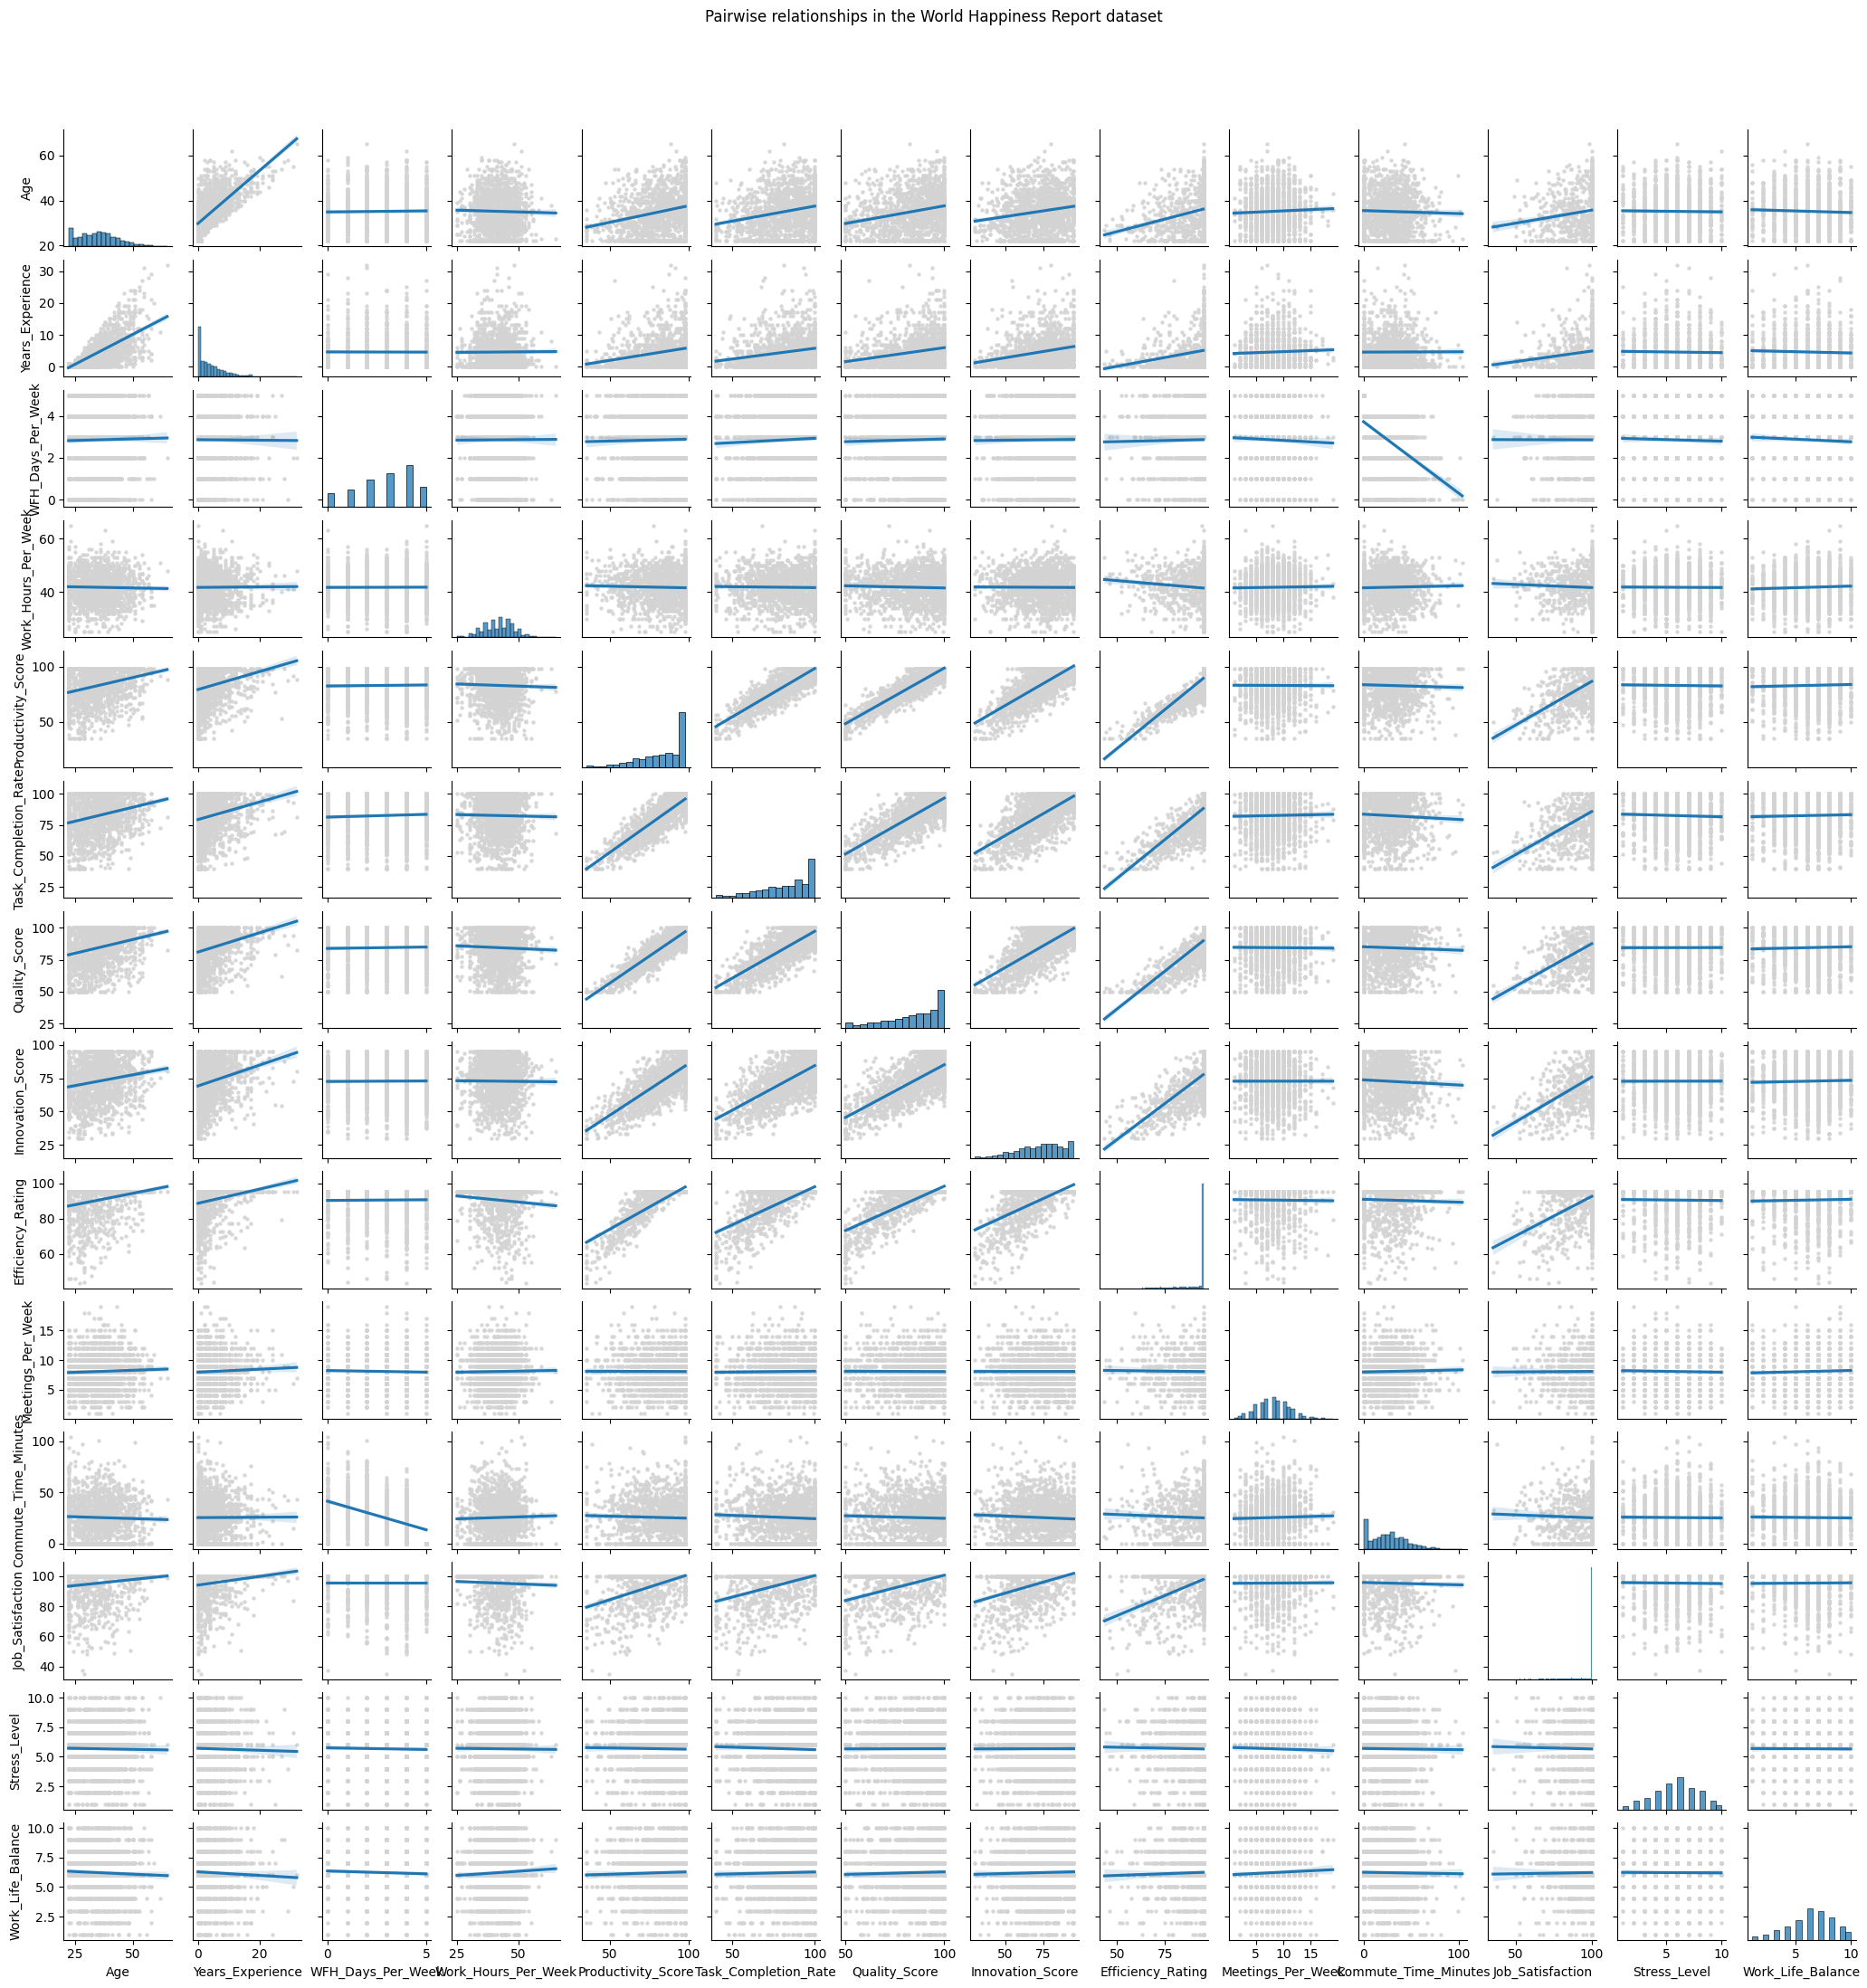

In [6]:
pairplot = sns.pairplot(data=df, plot_kws={"scatter_kws":{"color":"lightgrey", "s":5}}, height=1.5, kind='reg')
pairplot.fig.suptitle(
    "Pairwise relationships in the World Happiness Report dataset", y=1.05
)

### Q4: Plot a regression line and confidence interval
Select two of the features from your dataset and create a lmplot that shows the linear regression between them. Filter your data as you see fit. Include a meaningful title for the plot.

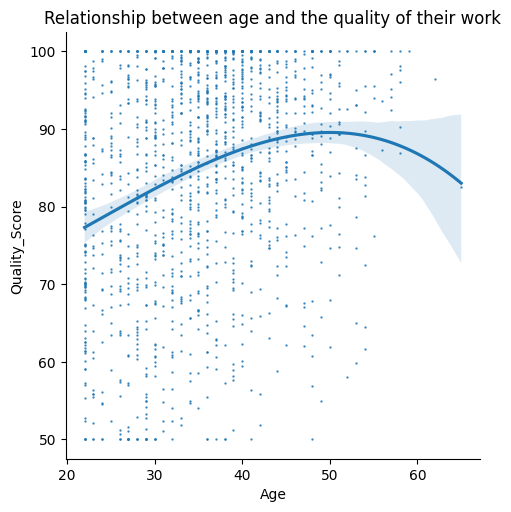

In [7]:
sns.lmplot(
    data=df,
    x="Age",
    y="Quality_Score",
    ci=95, # int
    order=3,
    markers='.',
    scatter_kws={'s':2}
)
plt.title(
"Relationship between age and the quality of their work"
);

### Q5. Create a relplot that shows multiple features in a single plot.
Select two features from your dataset and plot a scatter plot. Select two additional features you want to highlight in your data points using `hue` and `size`. Include a meaningful title to the plot.

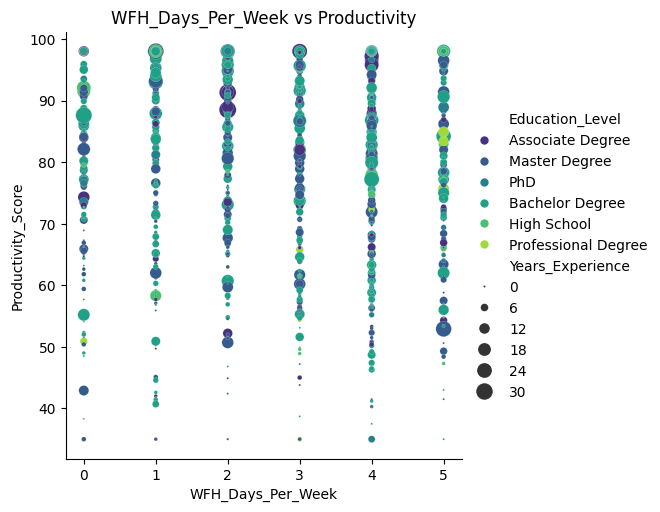

In [12]:
sns.relplot(
    data=df,
    y='Productivity_Score',
    x='WFH_Days_Per_Week',
    hue='Education_Level',
    size='Years_Experience',
    sizes=(2,150),
    palette="viridis"
)

plt.title("WFH_Days_Per_Week vs Productivity");

### Q6: Create a plot with small multiples plots
Select two features from your dataset and show the relationship between the features with an additional feature as the single category. Organize the multiple plots to have 3 plots per row. Set the `height` of the plot to 5 and the size the of data point to 20. Include a meaningful title in the plot.

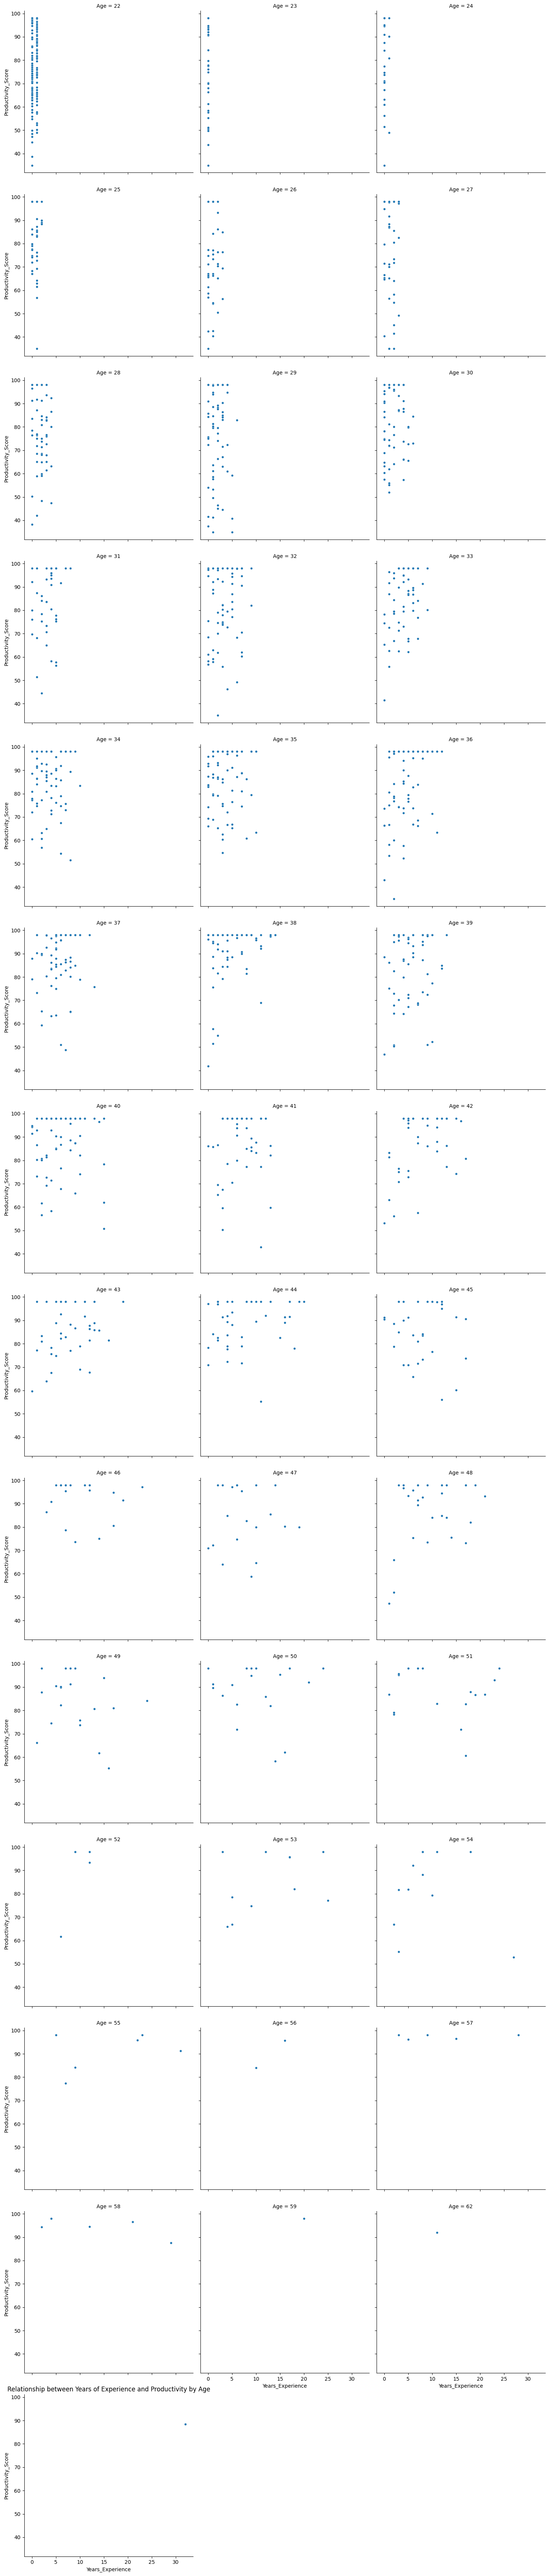

In [ ]:
x_feature = 'Years_Experience'
y_feature = 'Productivity_Score'
category_feature = 'Age'

g = sns.relplot(data=df, x=x_feature, y=y_feature, col=category_feature, col_wrap=3, height=5, s=20)
g.fig.suptitle(f'Relationship between Years of Experience and Productivity by Age', y=1)
plt.tight_layout()
plt.show()